In [ ]:
#19CS30001: Abhilash Datta
#DC1 [Mini-Project 3]
# Coronavirus Data Clustering using Complete Linkage Hierarchical Clustering Technique

In [1]:
import pandas as pd
import numpy as np

train_pd = pd.read_csv("COVID_1_unlabelled.csv")
train_pd.drop(columns=['Unnamed: 0'], inplace = True)
train_np = np.array(train_pd)

In [2]:
# Z score normalization

train_np = (train_np - np.mean(train_np,axis = 0))/np.std(train_np,axis = 0)
train_pd = (train_pd - np.mean(train_pd,axis = 0))/np.std(train_pd,axis = 0)

In [3]:
train_np.shape

(500, 3)

In [4]:
train_pd.head()

,mortality_rate,transmission_rate,incubation_period
0,0.997160,-1.131919,-1.055413
1,0.278043,1.228932,0.900450
2,0.221531,1.106734,1.738678
3,-1.031625,-0.012592,0.175497
4,0.523871,0.798797,1.179859


In [5]:
#plotting the dataset

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(train_pd['mortality_rate'],train_pd['transmission_rate'],train_pd['incubation_period'], color = "red")
plt.title("3D scatter plot")

plt.show()

<Figure size 1000x700 with 1 Axes>

In [6]:
np.random.seed(2)

In [7]:
#part 1
import numpy as np

class K_Means:

  def __init__(self, X, k = 3, iterations = 20):
    self.k = k
    self.n = X.shape[0]
    self.X = X
    self.iters = iterations

  def get_initial_centroids(self):
    lst = []
    count = 0
    for _ in range(self.k):
      i = np.random.randint(0,self.n)
      lst.append(self.X[i])

    return np.array(lst)     

  def get_distance(self,d1,d2):
    d1 = np.array(d1)
    d2 = np.array(d2)
    return np.linalg.norm(d1-d2)

  def get_clusters(self, centroids):
    cluster = dict()
    for i in range(self.k):
      cluster[i] = []

    for d in self.X:
      min_d = float('inf')
      for i in range(len(centroids)):
        if self.get_distance(centroids[i],d) < min_d:
          min_d = self.get_distance(centroids[i],d)  
          c = i
      
      cluster[c].append(d)

    return cluster

  def get_clusters_with_datapoint_indices(self,centroids):
    cluster = dict()
    for i in range(self.k):
      cluster[i] = []

    for d in range(len(self.X)):
      min_d = float('inf')
      for i in range(len(centroids)):
        if self.get_distance(centroids[i],self.X[d]) < min_d:
          min_d = self.get_distance(centroids[i],self.X[d])  
          c = i

      cluster[c].append(d)

    return cluster

  def update_centroids(self, clusters, old_centroids):
    centroids = []
    for key in clusters.keys():
      if len(clusters[key]) != 0:
        centroids.append(np.mean(clusters[key],axis = 0))
      else :
        centroids.append(old_centroids[key])

    return centroids   

  def final_centroids(self):

    initial_centroids = self.get_initial_centroids()
    old_centroids = initial_centroids

    for i in range(self.iters):
      clusters = self.get_clusters(old_centroids)
      new_centroids = self.update_centroids(clusters,old_centroids)
      old_centroids = new_centroids

    return new_centroids
  

In [8]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

k_means = K_Means(train_np)
g = k_means.final_centroids()
print("Final Centroids:")
pp.pprint(g)

final_clusters = k_means.get_clusters(g)
kmeans_clusters = k_means.get_clusters_with_datapoint_indices(g)


Final Centroids:
[   array([-1.15444099, -0.00714314,  0.05689934]),
    array([ 1.15383269, -1.21952999, -1.1948023 ]),
    array([0.00751747, 1.21937055, 1.13074846])]


In [9]:
#Storing in a file
fp = open('kmeans.txt','w')
f = 0
for i in kmeans_clusters[1]:
  if f==0: 
    fp.write(str(i))
    f = 1
  else:
    fp.write(', '+str(i))

fp.write('\n')
f = 0
for i in kmeans_clusters[2]:
  if f==0: 
    fp.write(str(i))
    f = 1
  else:
    fp.write(', '+str(i))

fp.write('\n')
f = 0
for i in kmeans_clusters[0]:
  if f==0: 
    fp.write(str(i))
    f = 1
  else:
    fp.write(', '+str(i))

fp.close()
fp = open('kmeans.txt', 'r') 
print(fp.read()) 
fp.close()

0, 6, 15, 17, 21, 26, 28, 33, 34, 38, 39, 42, 44, 45, 51, 66, 67, 69, 70, 72, 73, 74, 76, 77, 81, 82, 83, 86, 88, 89, 93, 95, 102, 103, 106, 107, 108, 112, 120, 121, 132, 133, 138, 142, 145, 149, 150, 152, 153, 166, 169, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 185, 189, 192, 196, 197, 198, 199, 201, 204, 208, 212, 215, 218, 219, 225, 233, 235, 236, 238, 239, 243, 245, 246, 249, 250, 252, 253, 257, 262, 263, 264, 267, 268, 273, 274, 277, 281, 290, 291, 293, 305, 308, 310, 316, 317, 322, 329, 333, 334, 343, 344, 349, 351, 353, 354, 357, 359, 360, 361, 363, 367, 371, 378, 380, 385, 387, 390, 393, 396, 397, 400, 408, 414, 416, 418, 423, 427, 428, 430, 434, 435, 439, 443, 446, 447, 450, 457, 458, 461, 463, 464, 469, 471, 476, 478, 480, 481, 482, 486, 487, 488, 489, 491, 494, 497
1, 2, 4, 7, 8, 10, 14, 19, 24, 29, 30, 32, 37, 41, 46, 48, 49, 50, 54, 55, 56, 57, 58, 61, 62, 63, 75, 84, 90, 92, 96, 97, 98, 99, 100, 101, 104, 109, 110, 111, 116, 118, 119, 122, 123, 127, 129, 131, 134,

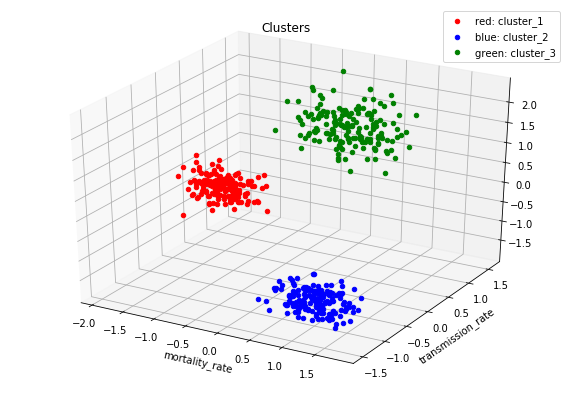

In [10]:
#plotting centroids with datapoints

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

c1 = np.array(final_clusters[0])
ax.scatter3D(c1[0][0],c1[0][1],c1[0][2], color = "red", label = 'red: cluster_1')
for i in range(1,len(c1)):
  ax.scatter3D(c1[i][0],c1[i][1],c1[i][2], color = "red")

c2 = np.array(final_clusters[1])
ax.scatter3D(c2[0][0],c2[0][1],c2[0][2], color = "blue", label = 'blue: cluster_2')
for i in range(1,len(c2)):
  ax.scatter3D(c2[i][0],c2[i][1],c2[i][2], color = "blue")

c3 = np.array(final_clusters[2])
ax.scatter3D(c3[0][0],c3[0][1],c3[0][2], color = "green", label = 'green: cluster_3')
for i in range(1,len(c3)):
  ax.scatter3D(c3[i][0],c3[i][1],c3[i][2], color = "green")

plt.title("Clusters")
plt.xlabel('mortality_rate')
plt.ylabel('transmission_rate')
plt.legend()

plt.show()

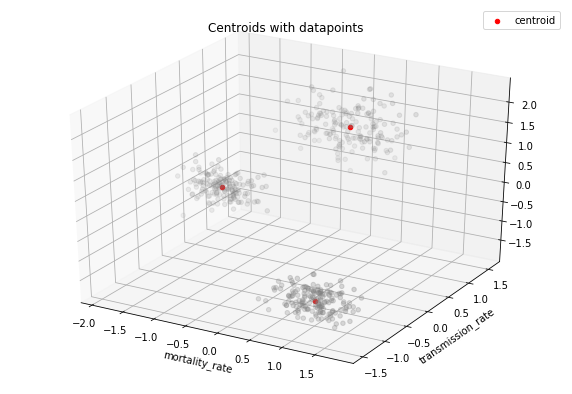

In [11]:
#plotting clusters classified

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
k = 3
for i in range(k):
  ax.scatter3D(g[i][0],g[i][1],g[i][2], color = "red")

ax.scatter3D(train_pd['mortality_rate'],train_pd['transmission_rate'],train_pd['incubation_period'], color = (0.5,0.5,0.5,0.3),)


plt.title("Centroids with datapoints")
plt.xlabel('mortality_rate')
plt.ylabel('transmission_rate')
plt.legend(['centroid'])

plt.show()

In [12]:
#part 2

class Evaluate:

  def __init__(self, model):
    self.model = model
  
  def cohesion(self,cluster,i):
    d = 0
    for j in cluster:
      if i is not j:
        d += self.model.get_distance(i,j)
    if len(cluster)==1:
      return 1
    return d/(len(cluster)-1)
    
  def separation(self,cluster_id,i,clusters):
    min_b = float('inf')
    for k in clusters.keys():
      d = 0
      if k!= cluster_id:
        for j in clusters[k]:
          d += self.model.get_distance(i,j)
        b = d/len(clusters[k])
        if b<min_b:
          min_b = b

    return min_b
  
  def silhouette_coefficient(self):
    max_sc = -float('inf')
    final_centroids = self.model.final_centroids()
    final_clusters = self.model.get_clusters(final_centroids)

    for k in final_clusters.keys():
      cluster = final_clusters[k]
      s = 0
      for i in cluster:
        b = self.separation(k,i,final_clusters)
        a = self.cohesion(cluster,i)
        s += (b-a)/max(b,a)
      
      s_tilde = s/len(cluster)
      if s_tilde>max_sc:
        max_sc = s_tilde
    
    return max_sc

  

In [13]:
eval = Evaluate(k_means)
eval.silhouette_coefficient()

0.826411075132873

In [14]:
# part 3

max_value = -float('inf')

for K in range(3,7):
    k_means = K_Means(train_np,k = K)
    eval = Evaluate(k_means)
    sc = eval.silhouette_coefficient()
    if max_value < sc:
        max_value = sc
        best_k = K
    print("Silhouette Coefficient for k =",K,"is",sc)
    
print("Optimal number of clusters =",best_k)

Silhouette Coefficient for k = 3 is 0.826411075132873
Silhouette Coefficient for k = 4 is 0.7697683256082659
Silhouette Coefficient for k = 5 is 0.8110466641419912
Silhouette Coefficient for k = 6 is 0.34535311407492514
Optimal number of clusters = 3


In [15]:
#part 4

class Agglomerative:

  def __init__(self, X, k = 3):
    self.k = k
    self.n = X.shape[0]
    self.X = X
  
  def get_euclidean_distance(self,d1,d2):
    d1 = np.array(d1)
    d2 = np.array(d2)
    return np.linalg.norm(d1-d2)

  def get_distance(self,c1,c2):
    max_d = -float('inf')
    for i in c1:
      for j in c2:
        if self.get_euclidean_distance(i,j)>max_d:
          max_d = self.get_euclidean_distance(i,j)
    return max_d
  
  def combine_clusters(self,k1,k2,clusters,dist_matrix):
    c = []
    for i in clusters[k1]:
      c.append(i)
    for i in clusters[k2]:
      c.append(i)

    clusters.pop(k1)
    clusters.pop(k2)
    clusters[min(k1,k2)] = c

    dist_matrix.pop(k1)
    dist_matrix.pop(k2)
    dist_matrix[min(k1,k2)] = dict()

    #Complete linkage (max distance)
    for i in dist_matrix.keys():
      if i!= min(k1,k2):
        dist_matrix[min(k1,k2)][i] = max(dist_matrix[i][k1],dist_matrix[i][k2])
        dist_matrix[i][min(k1,k2)] = max(dist_matrix[i][k1],dist_matrix[i][k2])
        dist_matrix[i].pop(max(k1,k2))

  def find_closest(self, dist_matrix):
    min_d = float('inf')
    pi = 0
    pj = 0
    for i in dist_matrix.keys():
      for j in dist_matrix[i].keys():
        if dist_matrix[i][j]<min_d and j>i:
          min_d = dist_matrix[i][j]
          pi = i
          pj = j
    return (pi,pj)

  def get_clusters(self):
    clusters = dict()

    for i in range(len(self.X)):
      clusters[i] = [self.X[i]]

    dist_matrix = dict()
    for i in range(self.n):
      dist_matrix[i] = dict()
      for j in range(self.n):
        if i!=j:
          dist_matrix[i][j] = self.get_distance(clusters[i],clusters[j])
    
    count = self.n

    while count!=self.k :
      k1,k2 = self.find_closest(dist_matrix)
      self.combine_clusters(k1,k2,clusters,dist_matrix)
      count -= 1

    new = dict()
    i = 0
    for k in clusters.keys():
      new[i] = clusters[k]
      i += 1

    return new


In [16]:
agg = Agglomerative(train_np,k = 3)
g = agg.get_clusters()

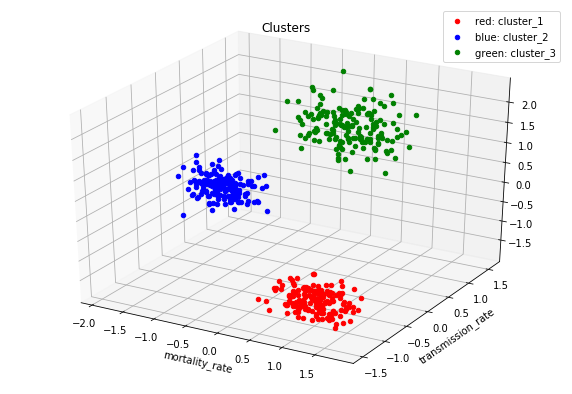

In [17]:
#plotting clusters
final_clusters = g

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

c = np.array(final_clusters[0])
ax.scatter3D(c[0][0],c[0][1],c[0][2], color = "red", label = 'red: cluster_1')
for i in range(1,len(c)):
  ax.scatter3D(c[i][0],c[i][1],c[i][2], color = "red")

c = np.array(final_clusters[1])
ax.scatter3D(c[0][0],c[0][1],c[0][2], color = "blue", label = 'blue: cluster_2')
for i in range(1,len(c)):
  ax.scatter3D(c[i][0],c[i][1],c[i][2], color = "blue")

c = np.array(final_clusters[2])
ax.scatter3D(c[0][0],c[0][1],c[0][2], color = "green", label = 'green: cluster_3')
for i in range(1,len(c)):
  ax.scatter3D(c[i][0],c[i][1],c[i][2], color = "green")

plt.title("Clusters")
plt.xlabel('mortality_rate')
plt.ylabel('transmission_rate')
plt.legend()

plt.show()

In [18]:
clusters = dict()
train_l = train_np.tolist()

for k in g.keys():
  clusters[k] = []
  for d in g[k]:
    l = d.tolist()
    clusters[k].append(train_l.index(l))

agg_clusters = clusters

In [19]:
#Storing in a file

agg_clusters = clusters

fp = open('agglomerative.txt','w')
f = 0
for i in sorted(agg_clusters[0]):
  if f==0: 
    fp.write(str(i))
    f = 1
  else:
    fp.write(', '+str(i))

fp.write('\n')
f = 0
for i in sorted(agg_clusters[2]):
  if f==0: 
    fp.write(str(i))
    f = 1
  else:
    fp.write(', '+str(i))

fp.write('\n')
f = 0
for i in sorted(agg_clusters[1]):
  if f==0: 
    fp.write(str(i))
    f = 1
  else:
    fp.write(', '+str(i))

fp.close()
fp = open('agglomerative.txt', 'r') 
print(fp.read()) 
fp.close()

0, 6, 15, 17, 21, 26, 28, 33, 34, 38, 39, 42, 44, 45, 51, 66, 67, 69, 70, 72, 73, 74, 76, 77, 81, 82, 83, 86, 88, 89, 93, 95, 102, 103, 106, 107, 108, 112, 120, 121, 132, 133, 138, 142, 145, 149, 150, 152, 153, 166, 169, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 185, 189, 192, 196, 197, 198, 199, 201, 204, 208, 212, 215, 218, 219, 225, 233, 235, 236, 238, 239, 243, 245, 246, 249, 250, 252, 253, 257, 262, 263, 264, 267, 268, 273, 274, 277, 281, 290, 291, 293, 305, 308, 310, 316, 317, 322, 329, 333, 334, 343, 344, 349, 351, 353, 354, 357, 359, 360, 361, 363, 367, 371, 378, 380, 385, 387, 390, 393, 396, 397, 400, 408, 414, 416, 418, 423, 427, 428, 430, 434, 435, 439, 443, 446, 447, 450, 457, 458, 461, 463, 464, 469, 471, 476, 478, 480, 481, 482, 486, 487, 488, 489, 491, 494, 497
1, 2, 4, 7, 8, 10, 14, 19, 24, 29, 30, 32, 37, 41, 46, 48, 49, 50, 54, 55, 56, 57, 58, 61, 62, 63, 75, 84, 90, 92, 96, 97, 98, 99, 100, 101, 104, 109, 110, 111, 116, 118, 119, 122, 123, 127, 129, 131, 134,

In [20]:
#Jaccard Similarity

class Jaccard:

  def __init__(self, kmeans_clusters, agg_clusters):
    self.kmeans_clusters = kmeans_clusters
    self.agg_clusters = agg_clusters

  def union(self, cluster1, cluster2):
    u = []
    for c in cluster1:
      u.append(c)
    for c in cluster2:
      if c not in u:
        u.append(c)
    return len(u)
    
  def intersection(self, cluster1, cluster2):
    i = []
    for c in cluster1:
      if c in cluster2:
        i.append(c)
    return len(i)
     
  def print_mappings_and_scores(self):
    
    js_scores = []
    for k1 in self.kmeans_clusters.keys():
      max_j = -float('inf')
      for k2 in self.agg_clusters.keys():
        jss = self.intersection(self.kmeans_clusters[k1],self.agg_clusters[k2])/self.union(self.kmeans_clusters[k1],self.agg_clusters[k2]) 
        if jss>max_j:
          max_j = jss
          p = k1
          q = k2
      js_scores.append((p,q,max_j))
      print("Cluster",k1,"of kmeans is mapped to Cluster",q,"of agglomerative")

    print()
    for k1,k2,j in js_scores:
      print('Jaccard Similarity Score for the',k1,'->',k2,'mapping:',j)


In [21]:
jaccard = Jaccard(kmeans_clusters, agg_clusters)
jaccard.print_mappings_and_scores()

Cluster 0 of kmeans is mapped to Cluster 1 of agglomerative
Cluster 1 of kmeans is mapped to Cluster 0 of agglomerative
Cluster 2 of kmeans is mapped to Cluster 2 of agglomerative

Jaccard Similarity Score for the 0 -> 1 mapping: 1.0
Jaccard Similarity Score for the 1 -> 0 mapping: 1.0
Jaccard Similarity Score for the 2 -> 2 mapping: 1.0
